# Machine Learning 101

Table of Contents
1. [](#pt1)  
2. [](#pt2)  
3. [](#pt3)  
4. [](#pt4)  
5. [](#pt5)  
6. [](#pt6)  

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
WHITE = '\033[39m'
CYAN = '\033[36m'

# <span id='pt1' style='font-size:0.8em;color:#1696d2'> 1. Modeling Workflow

- Exploratory Data Analysis  
- Define **hypothesis** and select the **estimator** to be used  ([Cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html))
- Split data into **train/test**, if necessary use **cross validation** too 
- Transform data, if necessary  
- Normalize data, if necessary  
- Create a instance of the estimator class with the desired **hyperparameters**  
- Train model using **train dataset**  
- Use the model to predict values in the **test/validation dataset**  
- Evaluate moel performance with **metrics** from the predictions  
- Restart cicle if necessary  
- **Deploy** model  

**Underfitting**:  
**Overfitting**:  
**Precision**:  
**Recall**:  

### Regression Example with single feature  

Train metrics:
r2_score: 0.84
mean_absolute_error: 27.25
mean_squared_error: 1145.94
Test metrics:
r2_score: 0.84
mean_absolute_error: 29.48
mean_squared_error: 1340.37


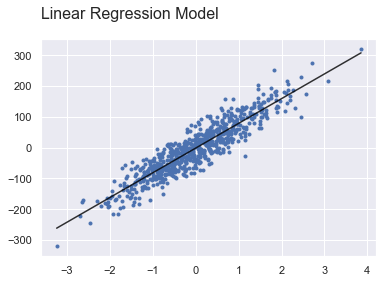

In [38]:
# Workflow after EDA is complete

# define features and target
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)

# define hypothesis: target = countinuos value -> linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# fit model with train data
lin_reg.fit(X_train, y_train)

# make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# evaluate metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def display_metrics(metric, y, y_pred):
    print(f'{CYAN}{metric.__name__}{WHITE}: {metric(y, y_pred):.2f}')

print('Train metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_train, y_pred_train)
print('Test metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_test, y_pred_test)

# visualize model
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = lin_reg.intercept_ + lin_reg.coef_[0]*x_axis # f(x) = b0 + b1*x
plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.title('Linear Regression Model', size=16, loc='left', pad=20)
plt.show()


### Regression Example with Polynomial Feature

Original features = 1, After transform = 2
Train metrics:
r2_score: 0.73
mean_absolute_error: 3581.93
mean_squared_error: 31768871.34
Test metrics:
r2_score: 0.73
mean_absolute_error: 4331.75
mean_squared_error: 45871961.47


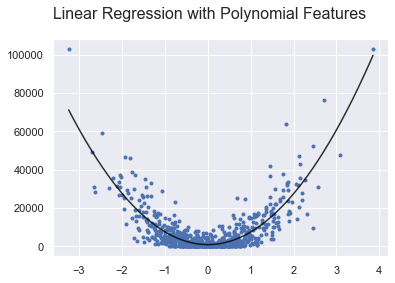

In [35]:
# define features and target
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)
y = y**2

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# transform feature(s)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train) # fit only train to avoid data leak
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)
print(f'Original features = {poly.n_features_in_}, After transform = {poly.n_output_features_}')

# fit model with train data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# evaluate metrics
print('Train metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_train, y_pred_train)
print('Test metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_test, y_pred_test)

# visualize model
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = lin_reg.intercept_ + lin_reg.coef_[0]*(x_axis) + lin_reg.coef_[1]*(x_axis**2) # f(x) = b0 + b1*x + b2*x2

plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.title('Linear Regression with Polynomial Features', size=16, loc='left', pad=20)
plt.show()

### Trade-off Bias vs Variance

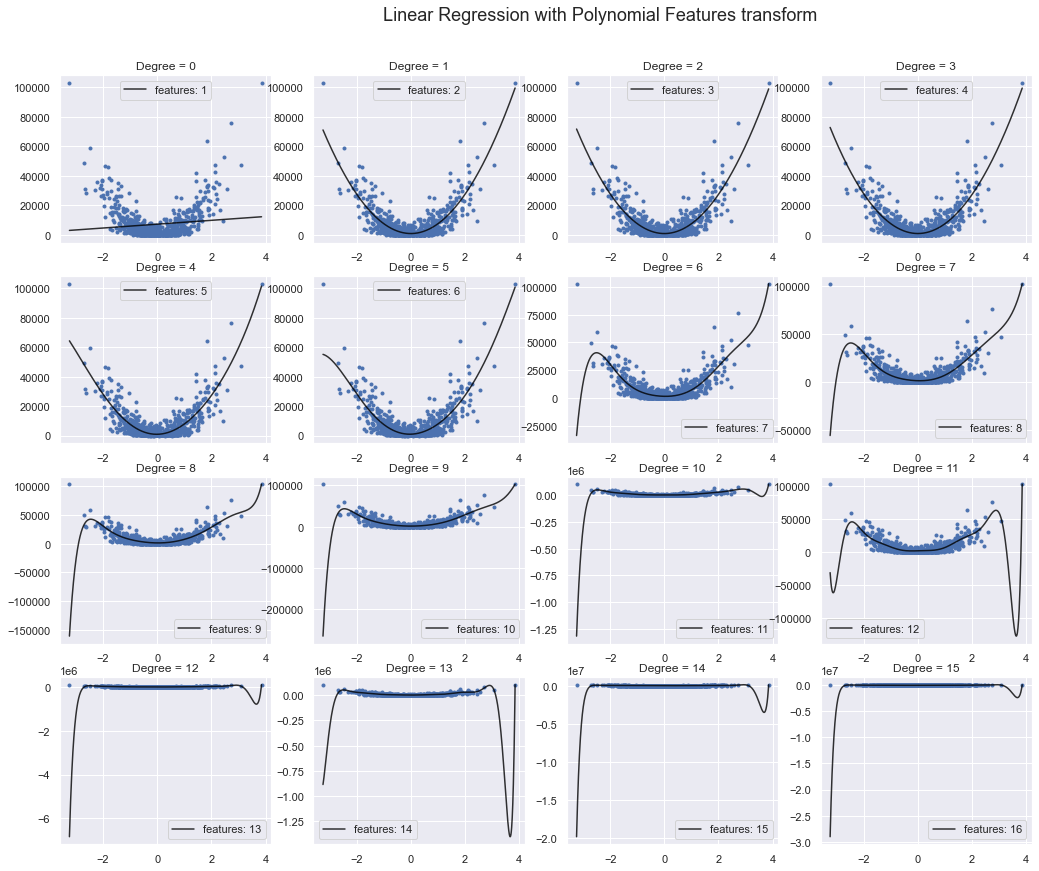

In [132]:
# empty df for store metrics data
results_df = pd.DataFrame({
    'Features':[],
    'MAE_train':[],
    'MAE_test':[],
    'R2_train':[],
    'R2_test':[]
})
# create data
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)
y = y**2
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# plot config
nrow, ncol = 4, 4
fig, ax = plt.subplots(nrow,ncol, figsize=(20,12))
# create model
for dg in range(nrow*ncol):
    # instance/fit poly
    poly = PolynomialFeatures(degree=dg+1, include_bias=False).fit(X_train)
    # transform features
    X_train_poly, X_test_poly = poly.transform(X_train), poly.transform(X_test)
    # fit model
    reg_lin = LinearRegression().fit(X_train_poly, y_train)
    # make prediction
    y_pred_train, y_pred_test = reg_lin.predict(X_train_poly), reg_lin.predict(X_test_poly)
    # visualize model
    x_axis = np.linspace(X.min(), X.max(), 1000)
    y_axis = reg_lin.intercept_ + sum([b_n*(x_axis**(n+1)) for n, b_n in enumerate(reg_lin.coef_)])
    ax[dg//nrow, dg%ncol].scatter(X,y, marker='.')
    ax[dg//nrow, dg%ncol].plot(x_axis, y_axis, color='black', alpha=0.8, label=f'features: {poly.n_output_features_}')
    ax[dg//nrow, dg%ncol].set_title(f'Degree = {dg}')
    ax[dg//nrow, dg%ncol].legend()
    #add metrics
    results_df = pd.concat([results_df,
                            pd.DataFrame({
                                'Features' : poly.n_output_features_,
                                'MAE_train' : mean_absolute_error(y_train, y_pred_train),
                                'MAE_test' : mean_absolute_error(y_test, y_pred_test),
                                'R2_train':r2_score(y_train, y_pred_train),
                                'R2_test':r2_score(y_test, y_pred_test)
                                }, index=[dg])
                            ])
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9)
fig.suptitle('Linear Regression with Polynomial Features transform',size=18);

In [134]:
results_df

,Features,MAE_train,MAE_test,R2_train,R2_test
0,1.0,7181.560933,8121.313244,0.013668,-0.054221
1,2.0,3581.933778,4331.752527,0.731494,0.730499
2,3.0,3581.400263,4325.382292,0.731511,0.732158
3,4.0,3581.195690,4321.621979,0.731529,0.734497
4,5.0,3579.894828,4340.232799,0.731904,0.715263
5,6.0,3581.464832,4408.618829,0.732056,0.682749
6,7.0,3544.409828,5078.571268,0.737072,-0.005538
7,8.0,3543.895806,5241.180968,0.737163,-0.279381
8,9.0,3538.829341,6027.308969,0.737724,-2.133741
9,10.0,3541.570521,6785.407158,0.737877,-4.935238


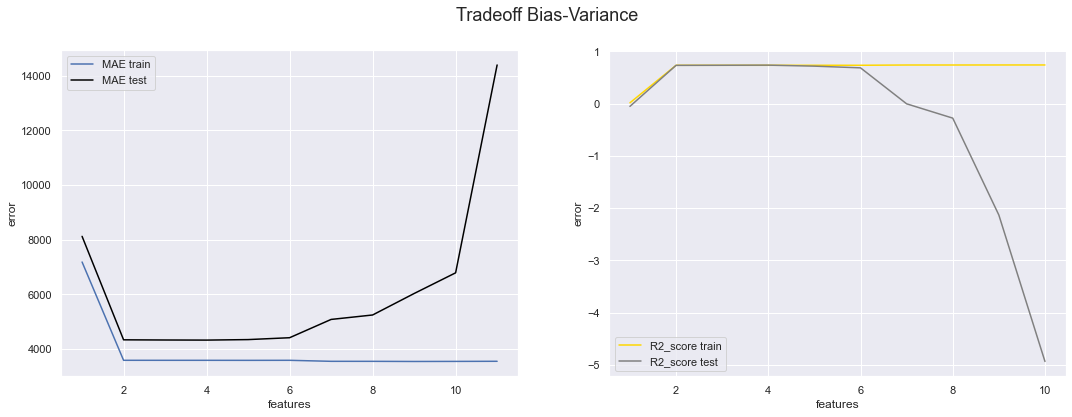

In [135]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(results_df[:11]['Features'], results_df[:11]['MAE_train'], label='MAE train')
ax[0].plot(results_df[:11]['Features'], results_df[:11]['MAE_test'], label='MAE test', color='black')
ax[1].plot(results_df[:10]['Features'], results_df[:10]['R2_train'], label='R2_score train', color='gold')
ax[1].plot(results_df[:10]['Features'], results_df[:10]['R2_test'], label='R2_score test', color='gray')
ax[0].set_xlabel('features'), ax[1].set_xlabel('features')
ax[0].set_ylabel('error'), ax[1].set_ylabel('error')
ax[0].legend(), ax[1].legend()
fig.suptitle('Tradeoff Bias-Variance', size=18);

### Regularization

### Logistic Regression

Used in **classification** problems, target variable is discrete.

<span style='font-size:2em'>$\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.</span>

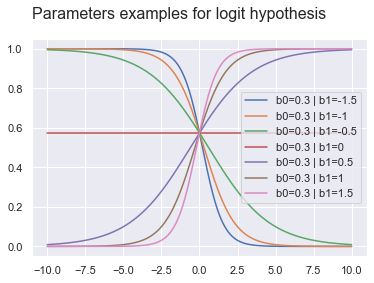

In [140]:
sigmoid = lambda x : 1 / (1 + np.exp(-x))
linear_hip = lambda x, b0 , b1: b0 + b1 * x
x = np.linspace(-10, 10, 1000)
b0 = 0.1
b1_list = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

for b1 in b1_list:
    y = sigmoid(linear_hip(x, b0, b1))
    plt.plot(x, y, label=f'b0={b0} | b1={b1}')
    plt.legend()
plt.title('Parameters examples for logit hypothesis', size=16, pad=20, loc= 'left')
plt.show()

In [161]:
# create data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=5)

Example of feature distribuition


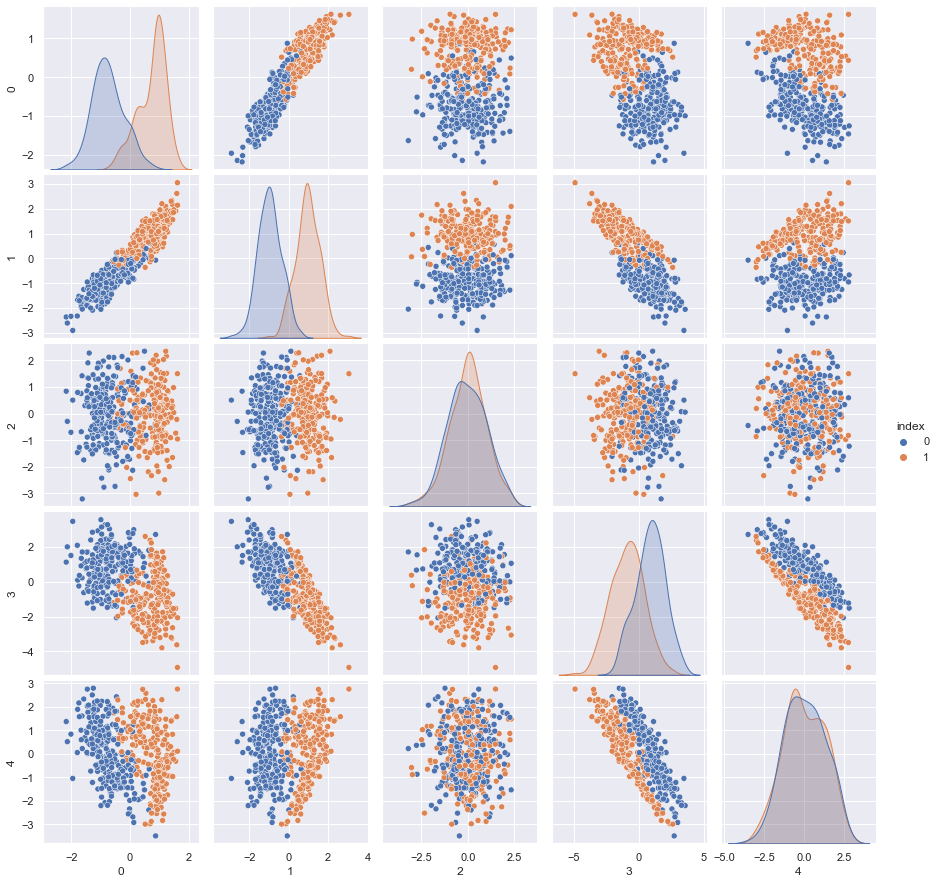

In [165]:
sns.pairplot(data=pd.DataFrame(X,y).reset_index(), hue='index')
print('Example of feature distribuition')

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
# fit model
logit = LogisticRegression().fit(X_train, y_train)

# predition with cutoff 50%
y_pred = logit.predict(X_test)
# classification probability
y_proba = logit.predict_proba(X_test)
print(f'Model accuracy: {sum(y_pred == y_test) / y_pred.shape[0] * 100} %')

#### Classification Metrics

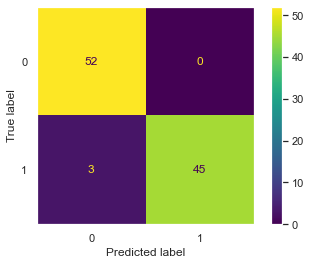

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False);

In [187]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# dict output: classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.94      0.97        48

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [191]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, pos_label=1), recall_score(y_test, y_pred)

(1.0, 0.9375)

# <span id='pt2' style='font-size:0.8em;color:#1696d2'> 2.  

# <span id='pt3' style='font-size:0.8em;color:#1696d2'> 3.  

# <span id='pt4' style='font-size:0.8em;color:#1696d2'> 4.  

# <span id='pt5' style='font-size:0.8em;color:#1696d2'> 5.  